# SPRINT 14 : JUNKY UNION

## Introduction

Film Junky Union, a new community for classic movie fans is developing a system to filter and categorize movie reviews.

### Goal

This project aims to train a model to automatically detect negative reviews using F1 score as an evaluation metric, which requires the model's F1 score to be greater than 0.85.

### Steps

To develop the model, we will use the IMBD movie review *dataset* with polarity labeling to create a model that can classify positive and negative reviews. The review data is stored in the filepath : `/datasets/imdb_reviews.tsv.` The model development is done with the following main steps:
1. Downloading data and performing data cleaning and pre-processing
2. Performing EDA.
3. Trained 3 models for the train dataset and tested them with the test dataset.
4. Generate multiple reviews and classifications with all models and analyze the results.

### Overview

**1. Introduction**
- Objective
- Stages
- Overview

**2. Data Preparation**
- Initialization
- Loading Dataset

**3. EDA**

**4. Data Pre-Processing**
- Evaluation Procedure
- Normalization
- Train/Test set separation

**5. Working with Models**
- Model 0 - Constant
- Method 1 - NLTK & TF-IDF
- Method 2 - spaCy & TF-IDF

**6. My Review**
- Model 1 - Logistic Regression
- Model 2 - Gusion naïve Bayes Classifier
- Model 3 - LGBM Classifier

**7. General Conclusion**

## Data Preparation

### Initialization

The first step is to prepare the necessary libraries.

In [1]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

import warnings
warnings.filterwarnings("ignore")

print('Library berhasil di import')

Library berhasil di import


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

# baris berikutnya menyediakan grafik dengan kualitas yang lebih baik di layar HiDPI 
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# pandas-integration
tqdm.pandas()

In [4]:
# Time Progress 

!pip install ipython-autotime

%load_ext autotime

time: 482 µs (started: 2023-09-10 23:42:34 +00:00)


### Loading Dataset

The movie review data is stored in the filepath: `/datasets/imdb_reviews.tsv`.

In [5]:
# memuat dataset dan menyimpanya dalam variabel df_reviews
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

time: 1.61 s (started: 2023-09-10 23:42:34 +00:00)


The next step displays the sample data along with general data information.

In [6]:
# menampilkan sampel data dan informasi umum dataset
df_reviews.head()

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


time: 31.7 ms (started: 2023-09-10 23:42:35 +00:00)


In [7]:
# menampilkan statistika deskriptif data
df_reviews.describe()

,start_year,is_adult,average_rating,votes,rating,pos,idx
count,47331.000000,47331.000000,47329.000000,4.732900e+04,47331.000000,47331.000000,47331.000000
mean,1989.631235,0.001732,5.998278,2.556292e+04,5.484608,0.498954,6279.697999
std,19.600364,0.041587,1.494289,8.367004e+04,3.473109,0.500004,3605.702545
min,1894.000000,0.000000,1.400000,9.000000e+00,1.000000,0.000000,0.000000
25%,1982.000000,0.000000,5.100000,8.270000e+02,2.000000,0.000000,3162.000000
50%,1998.000000,0.000000,6.300000,3.197000e+03,4.000000,0.000000,6299.000000
75%,2004.000000,0.000000,7.100000,1.397400e+04,9.000000,1.000000,9412.000000
max,2010.000000,1.000000,9.700000,1.739448e+06,10.000000,1.000000,12499.000000


time: 87.4 ms (started: 2023-09-10 23:42:35 +00:00)


In [8]:
# menampilkna informasi umum data
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

***
**Findings**

Based on the sample data and general data information, the following information was obtained:
1. The dataset consists of 47331 observations with 17 columns.
2. To perform model training, the column to be used is:
- `review` - which contains user reviews
- `pos` - target labeling, `0` for negative reviews, `1` for positive reviews
- `ds_part` - part of the test/train dataset
3. There are some different non-null counts with range index on some columns, but they will be skipped in this project as it will focus on training and testing the model.

## EDA

The first step is to check the number of movies and reviews over several years.

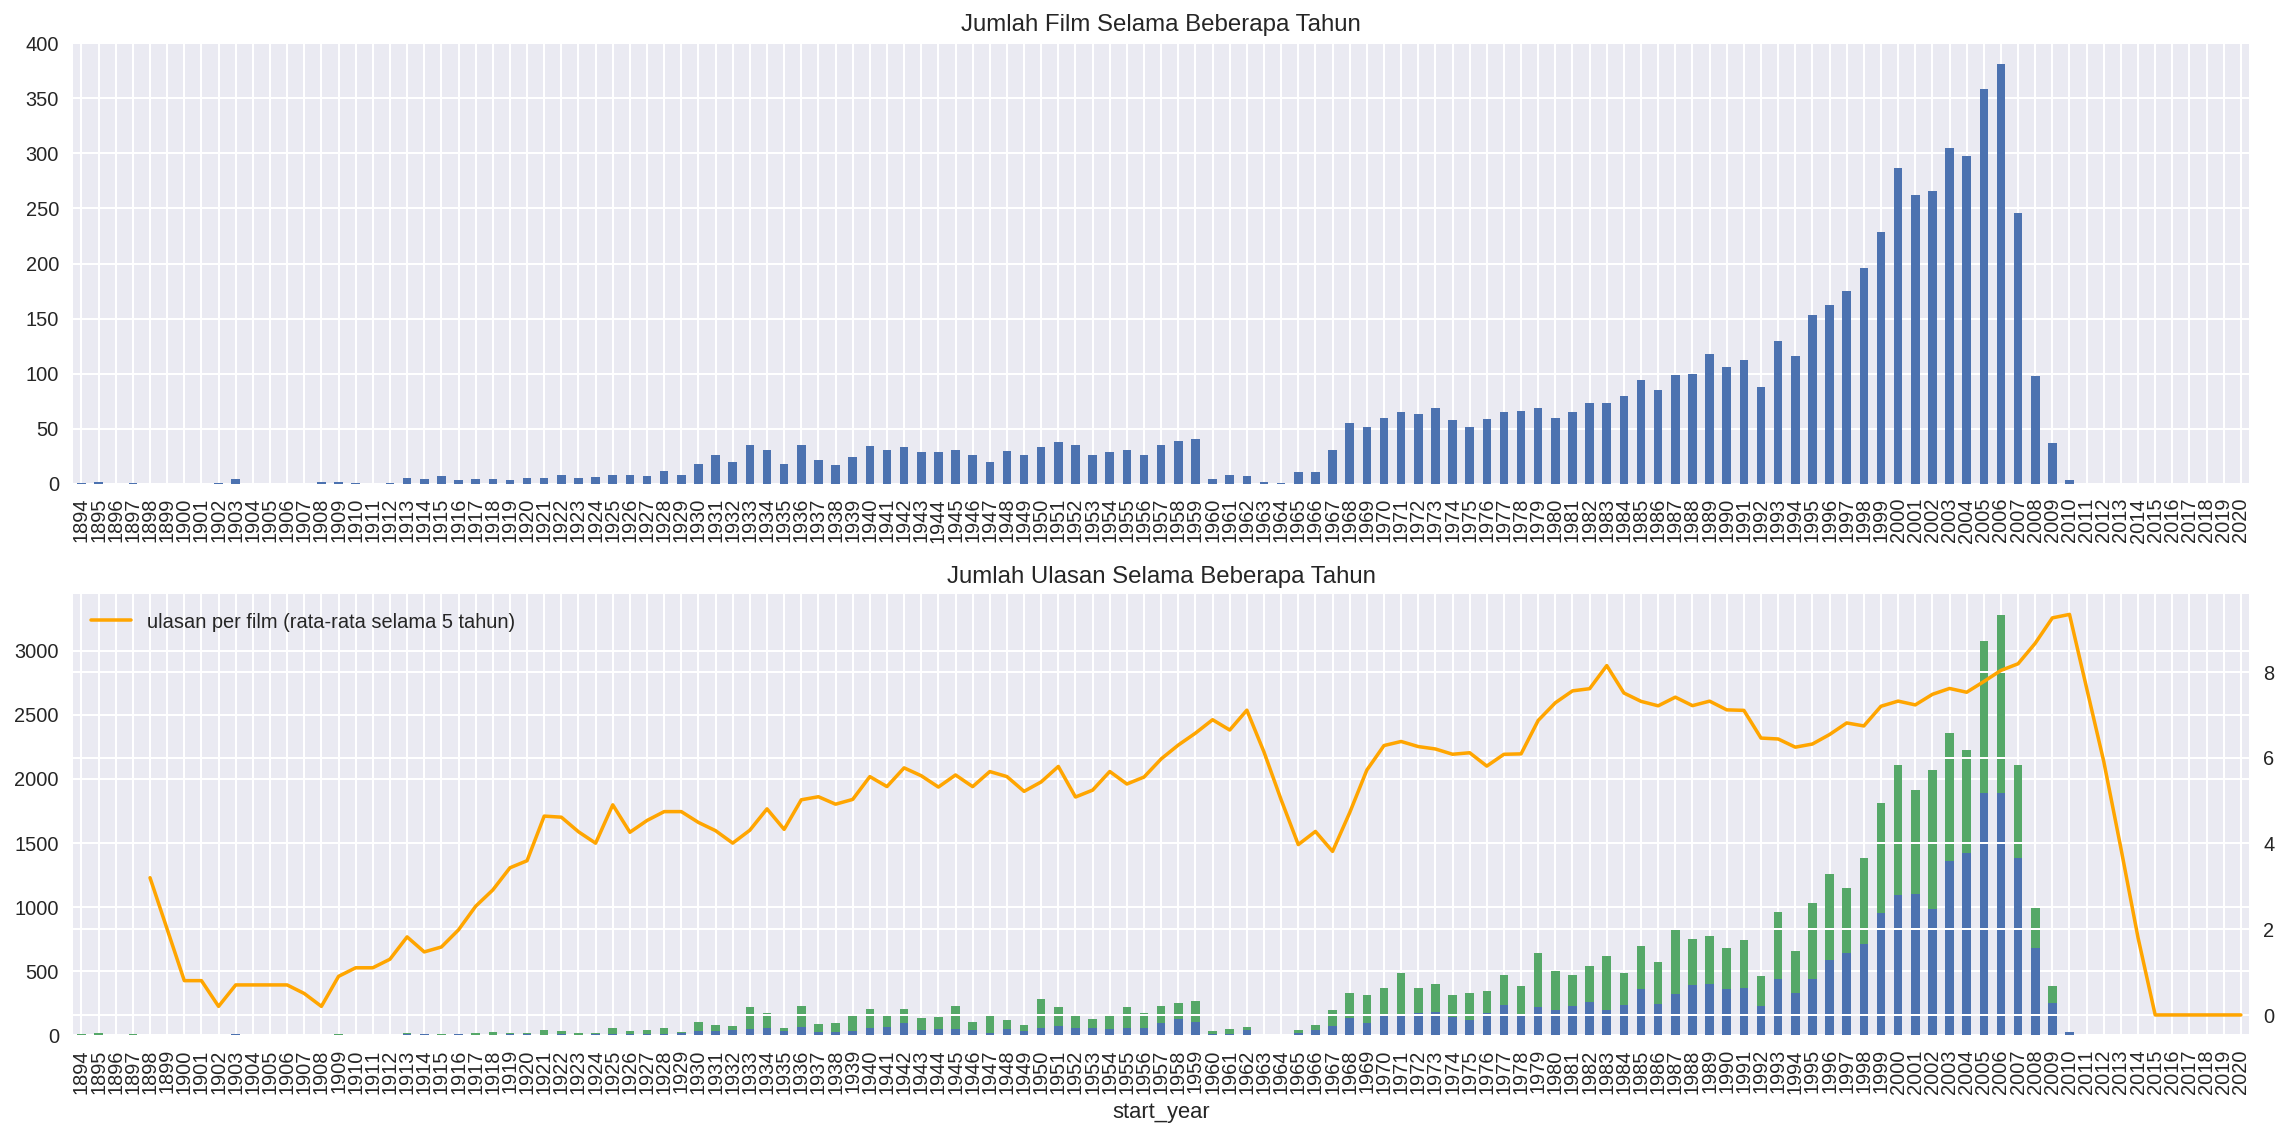

time: 5.52 s (started: 2023-09-10 23:42:36 +00:00)


In [9]:
# menampilkan grafik distribusi jumlah film dan ulasan selama beberapa tahun
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Jumlah Film Selama Beberapa Tahun')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#ulasan  (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='ulasan per film (rata-rata selama 5 tahun)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Jumlah Ulasan Selama Beberapa Tahun') 

fig.tight_layout()

Based on the graph above, it can be seen that the number of movies tends to increase every year where the highest number of movies occurred in the year `2006` but in the following year it decreased.

Next, check the distribution of the number of reviews per movie with the exact count and KDE (just to see how it differs from the exact count).

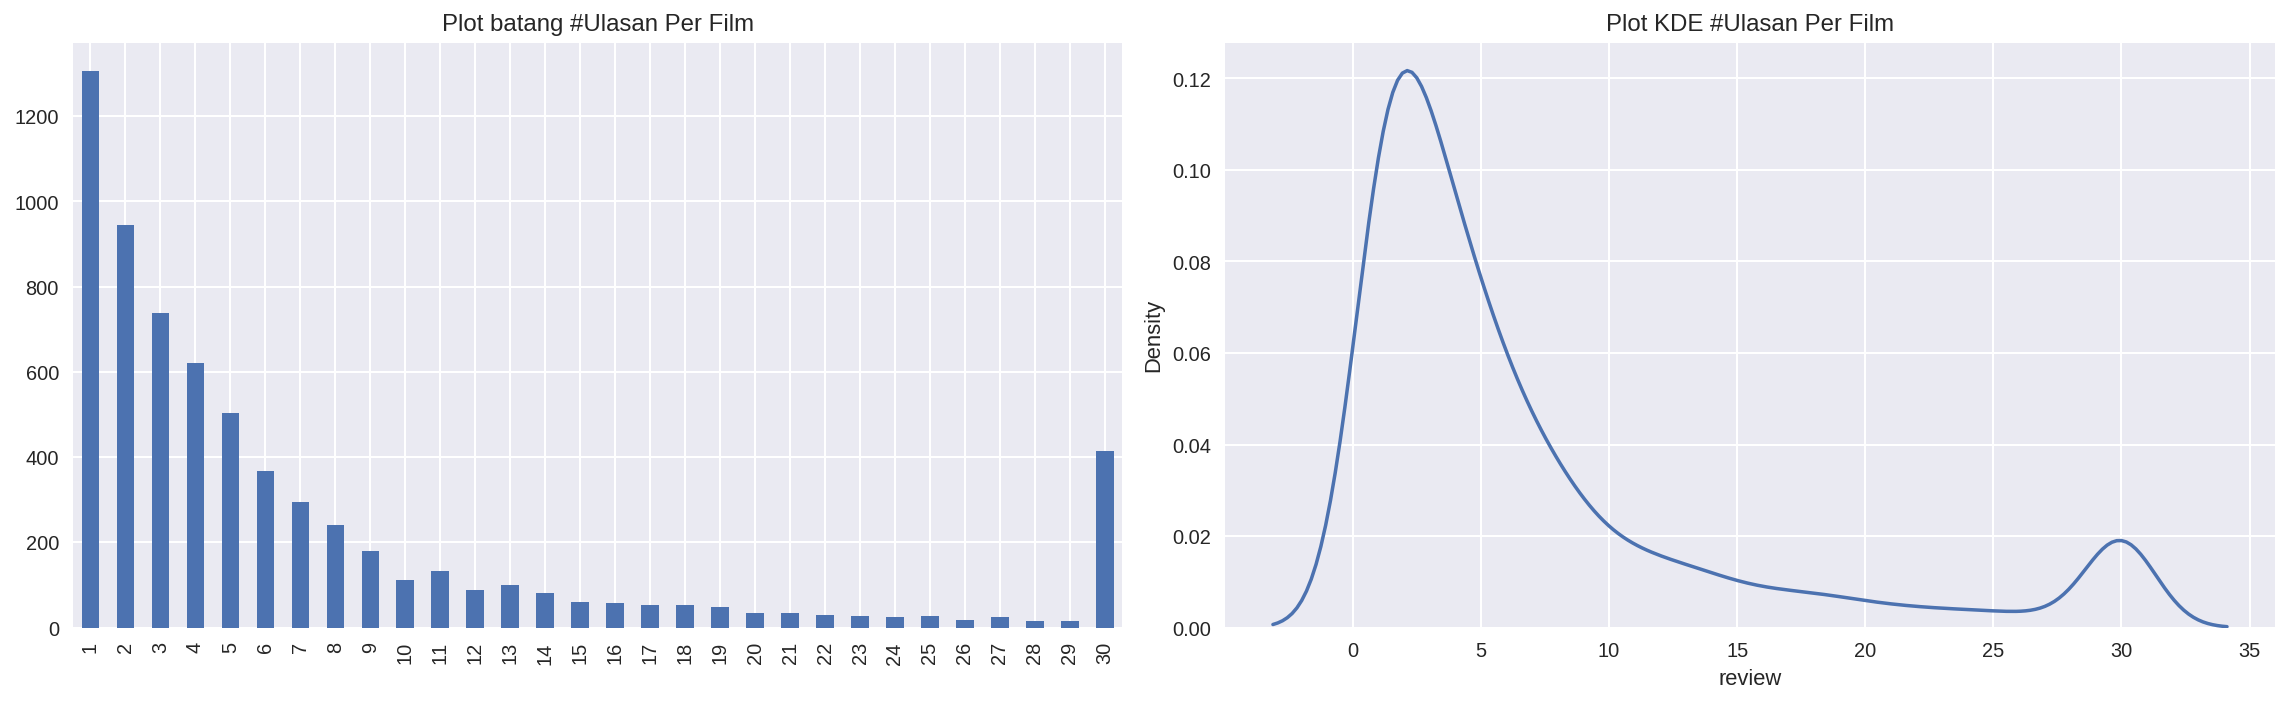

time: 1.13 s (started: 2023-09-10 23:42:41 +00:00)


In [10]:
# distribusi jumlah ulasan perfilm
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Plot batang #Ulasan Per Film')
ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Plot KDE #Ulasan Per Film') 

fig.tight_layout()

Based on the graph above, we can see that generally each movie has a small number of reviews, but there is a high peak at `30` reviews, meaning that there are quite a few movies around `400` movies that have a large number of reviews.

In [11]:
# menampilkan poporsi ulasan negatif dan positif
pos = df_reviews['pos'].value_counts()
data_percent = df_reviews['pos'].value_counts(normalize=True).mul(100).round(2).astype('str')+"%"
prop_pos = pd.DataFrame(data={"percent%" : data_percent, "count" : pos}).rename_axis('pos')
prop_pos

,percent%,count
pos,,
0,50.1%,23715
1,49.9%,23616


time: 12.8 ms (started: 2023-09-10 23:42:42 +00:00)


Based on the proportions above, knowing that the percentage of negative `0` and positive `1` reviews is almost similar, the distribution of the different polarities of the movies will be shown.

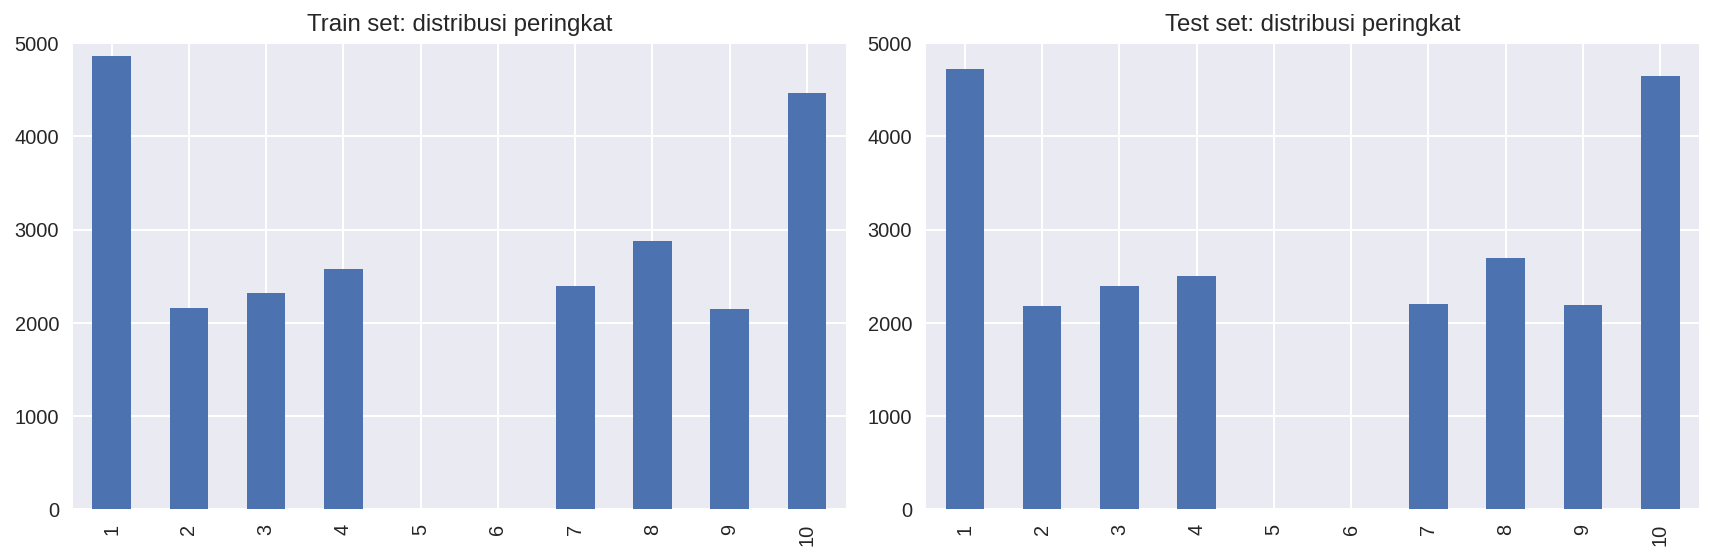

time: 647 ms (started: 2023-09-10 23:42:42 +00:00)


In [12]:
# menampilkan distribusi peringkat berdasarkan dataset train dan test
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('Train set: distribusi peringkat')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('Test set: distribusi peringkat')

fig.tight_layout()

Distribution of negative and positive reviews over the years for two parts of the *dataset*.

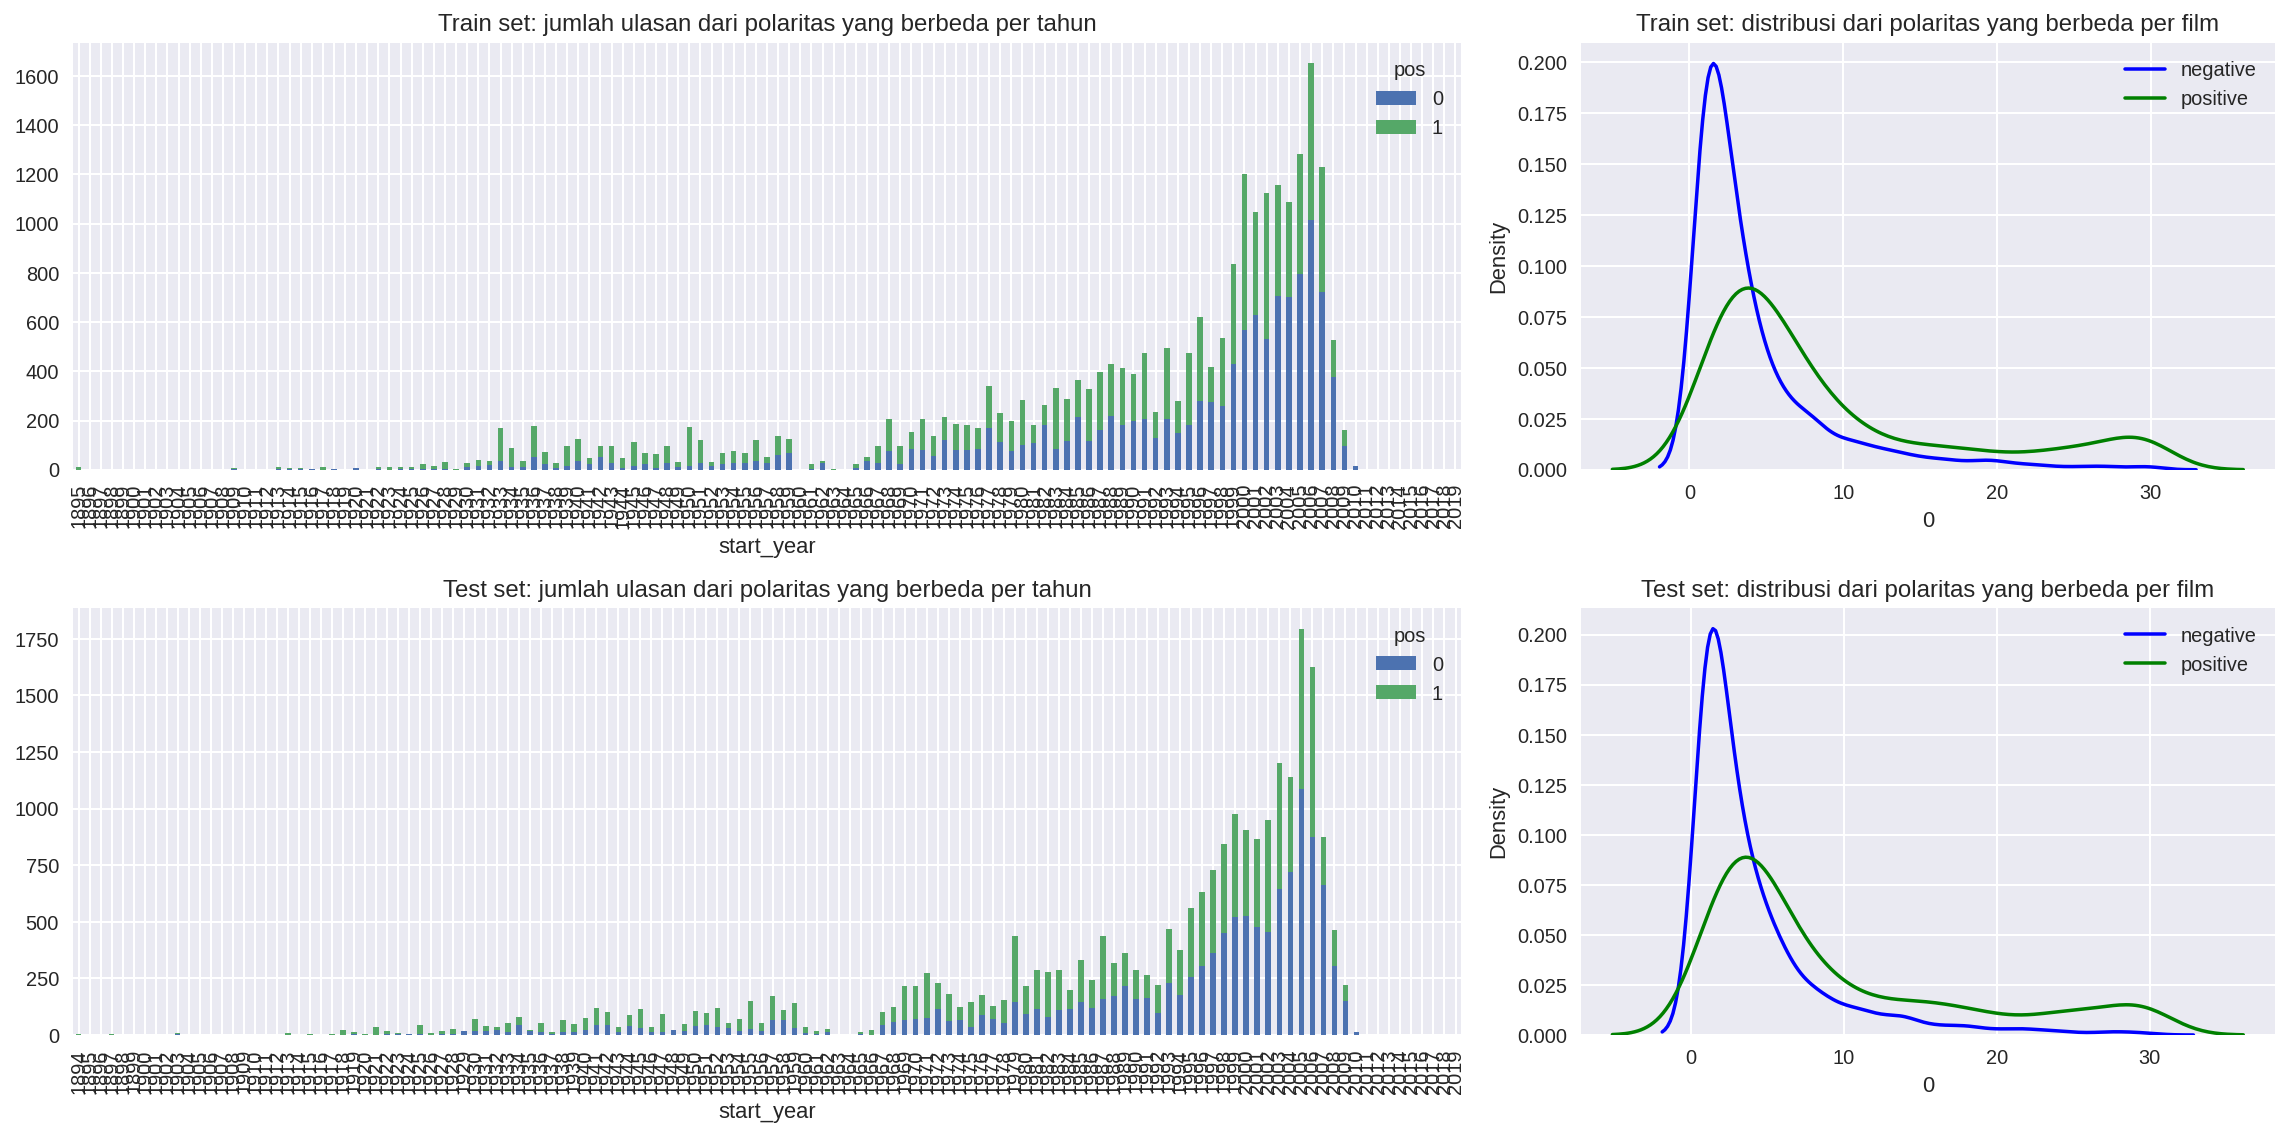

time: 6.54 s (started: 2023-09-10 23:42:43 +00:00)


In [13]:
# menampilkan grafik distribusi ulasan negatif dan positif pada dataset train dan test
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Train set: jumlah ulasan dari polaritas yang berbeda per tahun')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('Train set: distribusi dari polaritas yang berbeda per film')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Test set: jumlah ulasan dari polaritas yang berbeda per tahun')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('Test set: distribusi dari polaritas yang berbeda per film')

fig.tight_layout()

Based on the graph above, it is known that movies with a small number of reviews tend to have negative reviews compared to positive reviews, so it is quite reasonable if there are not many reviews for the movie. This is in contrast to movies that have a large number of reviews that tend to have positive reviews.

## Data Pre-Processing

### Evaluation Procedure

Develop evaluation metrics that can be used for all models.

In [14]:
import sklearn.metrics as metrics
from sklearn.metrics import (accuracy_score, f1_score)

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Scor F1 
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Skor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

time: 348 ms (started: 2023-09-10 23:42:49 +00:00)


### Normalization

We assume all models below accept text in lowercase and without numbers, punctuation, etc.

In [15]:
# melakukan normalisasi kolom review dan menyimpannya dalam kolom review_norm
df_reviews['review_norm'] = df_reviews['review'].str.lower().str.replace('[^a-zA-Z]', ' ')

time: 4.5 s (started: 2023-09-10 23:42:50 +00:00)


In [16]:
df_reviews['review_norm'].head(5)

0    the pakage implies that warren beatty and gold...
1    how the hell did they get this made   presenti...
2    there is no real story the film seems more lik...
3    um      a serious film about troubled teens in...
4    i m totally agree with garryjohal from singapo...
Name: review_norm, dtype: object

time: 11.9 ms (started: 2023-09-10 23:42:54 +00:00)


Normalization has been successfully performed.

### Splitting Train / Test set

In [17]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)
time: 49.9 ms (started: 2023-09-10 23:42:54 +00:00)


The dataset is ready to be trained and tested.

## Working with Models

Before training the dataset, first simplify the text in the data set by performing tokenization and lemmatization using two libraries, namely:
1. Natural Language Toolkit (NTLK)
2. spaCy

then define Term Frequency and Inverse Document Frequency to convert text data into vectors. The model to be trained is:
- Logistic Regression
- Gusion Naïve Bayes Classifier
- LightGBM Classifier

### Model 0 - Konstan

In [18]:
from sklearn.dummy import DummyClassifier

time: 3.32 ms (started: 2023-09-10 23:42:54 +00:00)


In [19]:
dummy = DummyClassifier(strategy='constant', constant=1)

model_0 = dummy.fit(X=df_reviews_train, y=train_target)

time: 2.06 ms (started: 2023-09-10 23:42:54 +00:00)


          train  test
Accuracy   0.50  0.50
F1         0.67  0.67
APS        0.50  0.50
ROC AUC    0.50  0.50


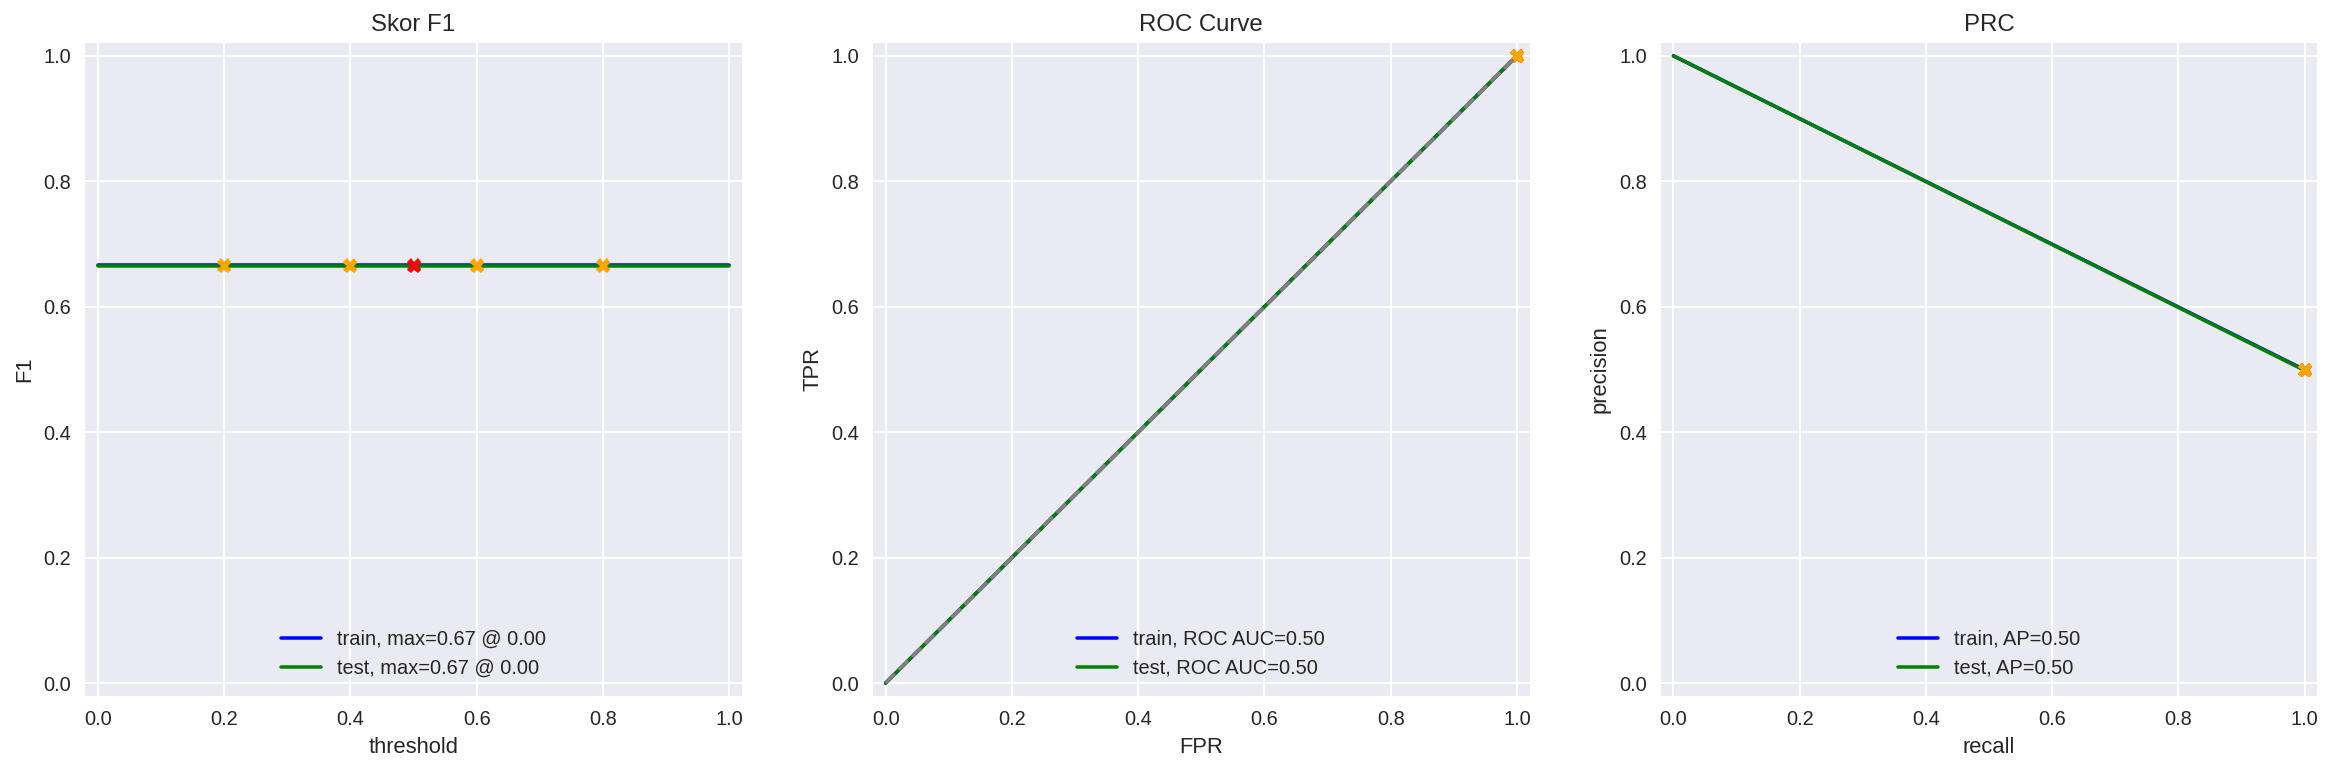

time: 1.23 s (started: 2023-09-10 23:42:54 +00:00)


In [20]:
evaluate_model(model_0, np.empty(len(train_target)), train_target, np.empty(len(test_target)), test_target)

Based on the results of training and testing with a constant model, an F1_score of `0.67` is obtained for the train and test datasets. The quality of the trained model must exceed the F1_score of the constant model.

### Metode 1 - NLTK & TF-IDF

To facilitate the analysis of evaluation metrics, a dataframe will be created to store evaluation metrics scores in the `eva_metrics_nltk` dataframe.

In [21]:
# Data Frame hasil Model dengan NLTK & TF-IDF
eva_metrics_nltk = {"Models": ["Logistic Regression Classifier",
                                 "Gaussian Naive Bayes",
                                 "LightGBM Classifier" ],"Accuracy_score": [0.0]*3, "F1 Score": [0.0]*3}
eva_nltk = {"Logistic Regression Classifier":0,
                "Gaussian Naive Bayes":1,
                "LightGBM Classifier":2}

time: 3.17 ms (started: 2023-09-10 23:42:56 +00:00)


Import the required libraries.

In [22]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

time: 354 ms (started: 2023-09-10 23:42:56 +00:00)


In [23]:
# membuat instance tidf
tfidf = TfidfVectorizer(stop_words=stopwords.words('english'), lowercase=True)

time: 3.75 ms (started: 2023-09-10 23:42:56 +00:00)


In [24]:
# menyiapkan feature baru
train_features_1 = tfidf.fit_transform(df_reviews_train['review_norm'])
test_features_1 = tfidf.transform(df_reviews_test['review_norm'])

print(train_features_1.shape)
print(test_features_1.shape)

(23796, 71531)
(23535, 71531)
time: 9.67 s (started: 2023-09-10 23:42:56 +00:00)


#### Model Logistic Regression

In [25]:
# melatih model
model_1 = LogisticRegression(random_state=42, solver='liblinear')
model_1.fit(train_features_1, train_target)

# prediksi dataset test
pred_lr_nltk = model_1.predict(test_features_1)

time: 5.15 s (started: 2023-09-10 23:43:06 +00:00)


          train  test
Accuracy   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


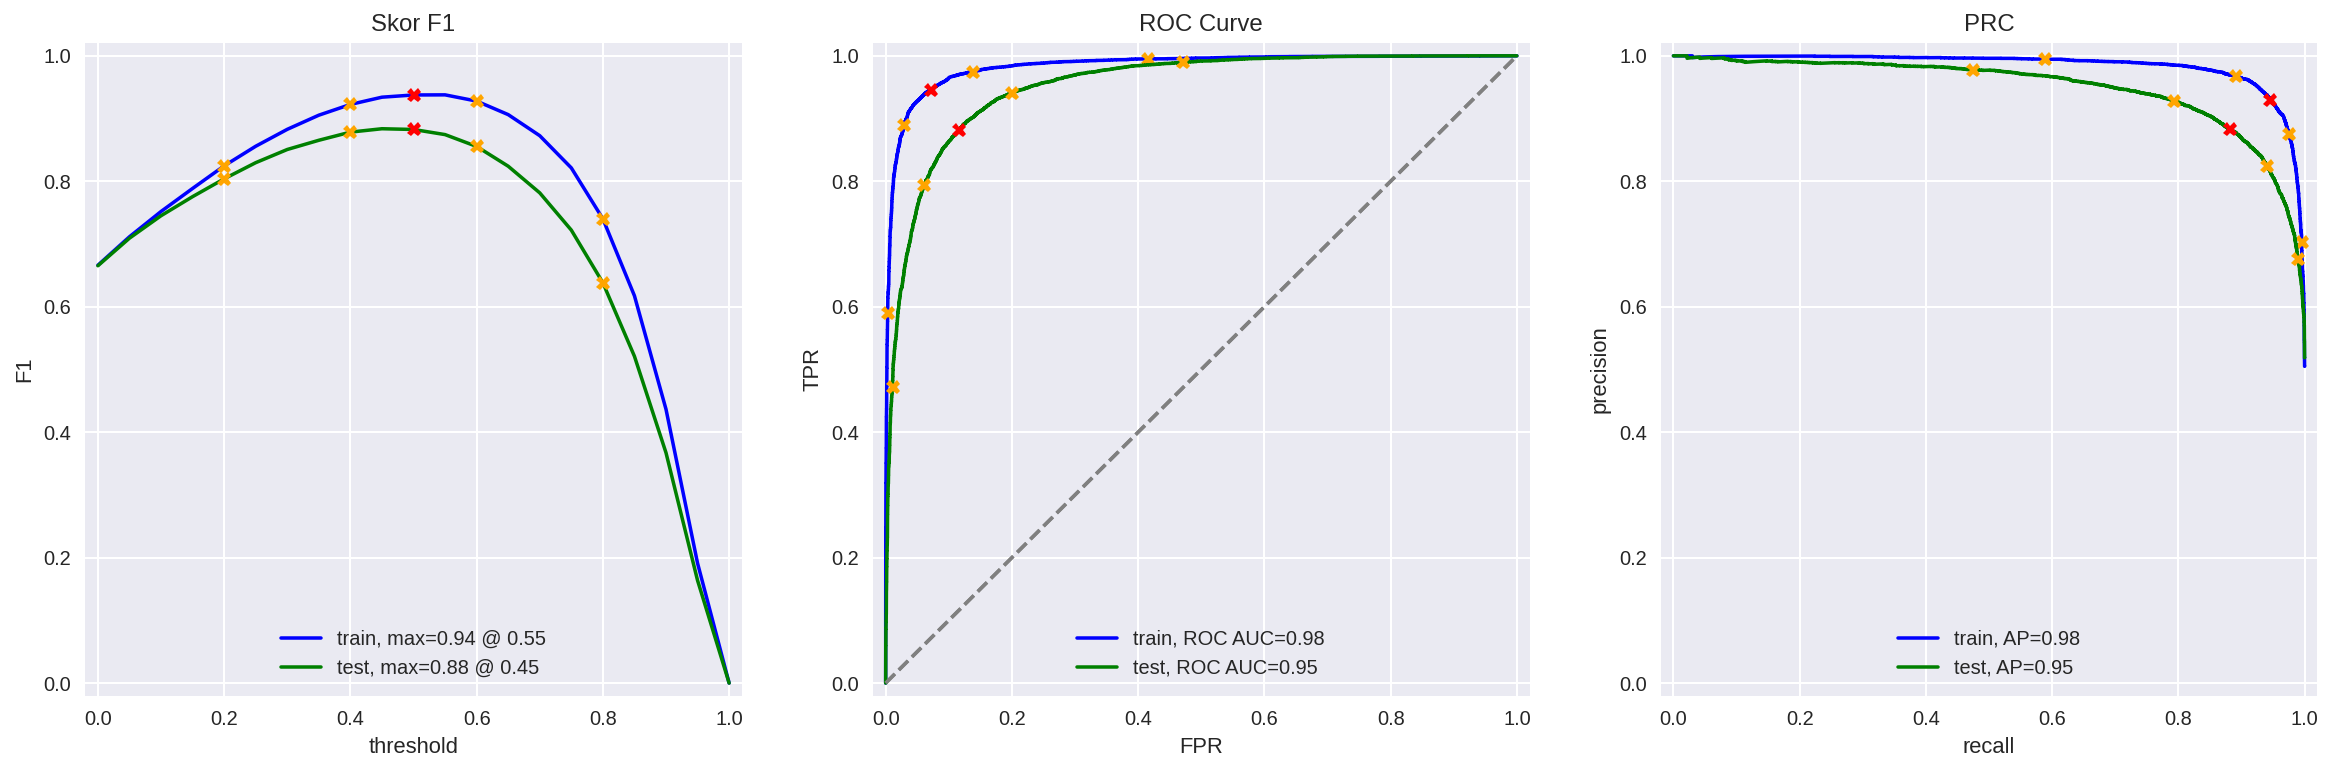

time: 1.34 s (started: 2023-09-10 23:43:11 +00:00)


In [26]:
# menampilkan evaluasi model
evaluate_model(model_1, train_features_1, train_target, test_features_1, test_target)

Based on the results of the `Logistric Regression` model evaluation metrics, a fairly high F1_score value is obtained, which is `0.94` on the train dataset and `0.88` on the test dataset.

In [27]:
# menyimpan evaluation metric pada variabel log_metric_eva
acc_lr = accuracy_score(test_target, pred_lr_nltk)
f1_score_lr  = f1_score(test_target, pred_lr_nltk)

eva_metrics_nltk["Accuracy_score"][eva_nltk["Logistic Regression Classifier"]] = acc_lr
eva_metrics_nltk["F1 Score"][eva_nltk["Logistic Regression Classifier"]] = f1_score_lr

time: 16.6 ms (started: 2023-09-10 23:43:12 +00:00)


#### Model Gusion naïve Bayes Classifier

In [28]:
# mengimport library
from sklearn.naive_bayes import MultinomialNB

time: 23.7 ms (started: 2023-09-10 23:43:12 +00:00)


In [29]:
# melatih model
model_2 = MultinomialNB()
model_2.fit(train_features_1, train_target)

# prediksi
pred_gb_nltk = model_2.predict(test_features_1)

time: 45.5 ms (started: 2023-09-10 23:43:12 +00:00)


          train  test
Accuracy   0.92  0.83
F1         0.92  0.82
APS        0.97  0.91
ROC AUC    0.97  0.92


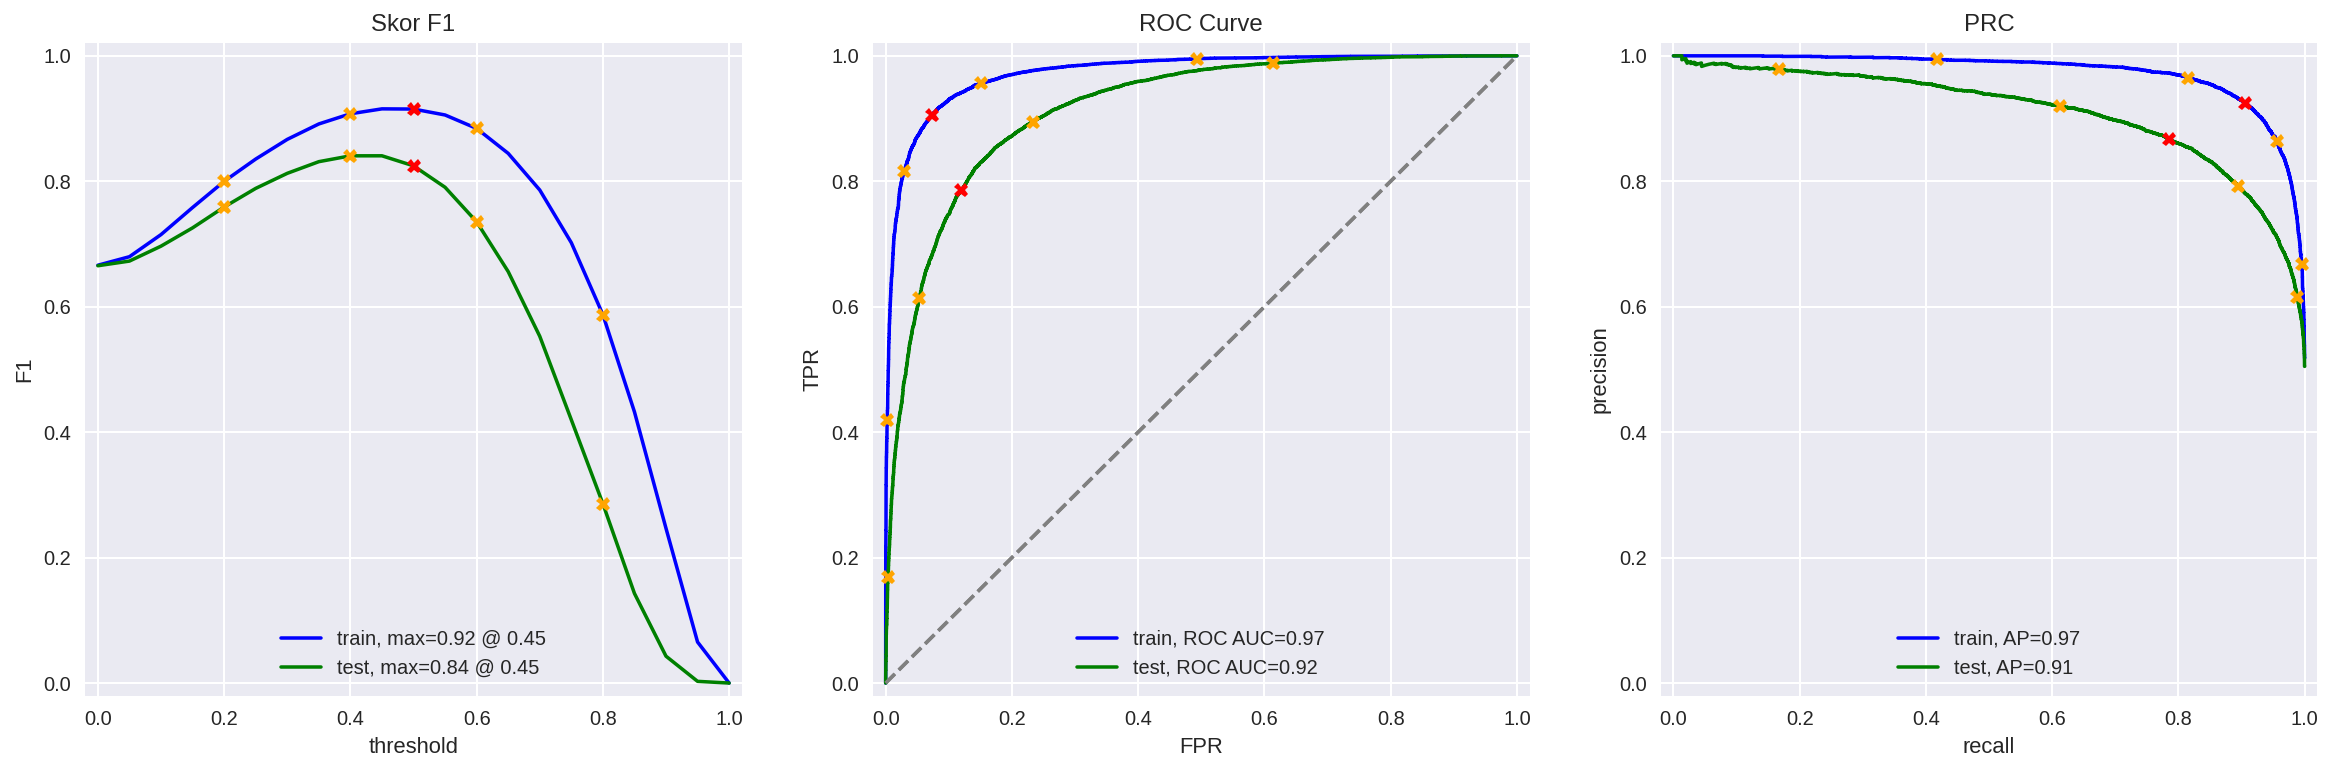

time: 1.37 s (started: 2023-09-10 23:43:12 +00:00)


In [30]:
# menampilkan evaluasi model
evaluate_model(model_2, train_features_1, train_target, test_features_1, test_target)

Based on the above results, a fairly high F1_score value is obtained in this model, which is `0.92` on the train dataset, and `0.82` on the test dataset.

In [31]:
# menyimpan evaluation metric pada variabel log_metric_eva
acc_gb = accuracy_score(test_target, pred_gb_nltk)
f1_score_gb  = f1_score(test_target, pred_gb_nltk)

eva_metrics_nltk["Accuracy_score"][eva_nltk["Gaussian Naive Bayes"]] = acc_gb
eva_metrics_nltk["F1 Score"][eva_nltk["Gaussian Naive Bayes"]] = f1_score_gb

time: 13.1 ms (started: 2023-09-10 23:43:14 +00:00)


#### Model LGBM Classifier

In [32]:
# mengimport library LGBM classifier
from lightgbm import LGBMClassifier

time: 52.4 ms (started: 2023-09-10 23:43:14 +00:00)


In [33]:
# melatih model
model_3 = LGBMClassifier(random_state=42)

model_3.fit(train_features_1, train_target)

# prediksi model
pred_lgb_nltk = model_3.predict(test_features_1)

time: 6min 42s (started: 2023-09-10 23:43:14 +00:00)


          train  test
Accuracy   0.91  0.86
F1         0.92  0.86
APS        0.97  0.93
ROC AUC    0.97  0.94


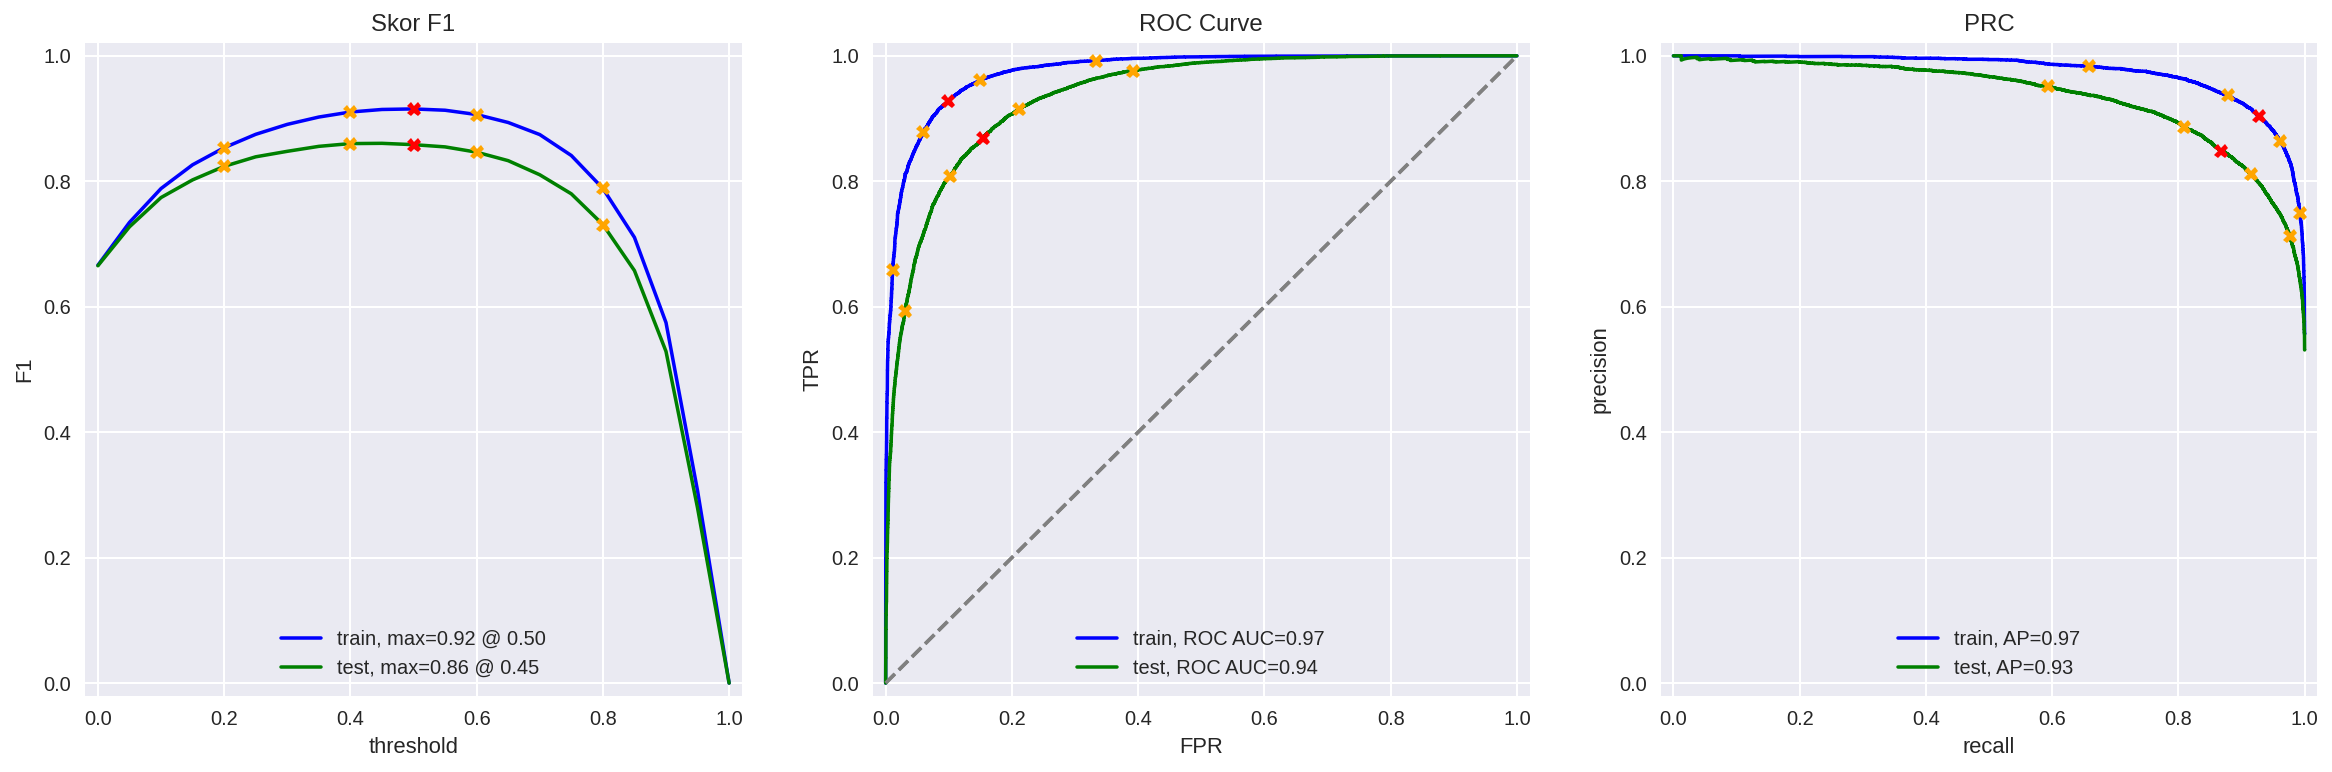

time: 3.05 s (started: 2023-09-10 23:49:56 +00:00)


In [34]:
# menampilkan evaluasi model
evaluate_model(model_3, train_features_1, train_target, test_features_1, test_target)

Based on the above results, the F1_score value of the LGBM Classifier model is `0.92` on the train dataset, `0.86` on the test dataset.

In [35]:
# menyimpan evaluation metric pada variabel log_metric_eva
acc_lgb = accuracy_score(test_target, pred_lgb_nltk)
f1_score_lgb  = f1_score(test_target, pred_lgb_nltk)

eva_metrics_nltk["Accuracy_score"][eva_nltk["LightGBM Classifier"]] = acc_lgb
eva_metrics_nltk["F1 Score"][eva_nltk["LightGBM Classifier"]] = f1_score_lgb

time: 16.3 ms (started: 2023-09-10 23:49:59 +00:00)


### Metode 2 - spaCy & TF-IDF

To facilitate the analysis of evaluation metrics, a dataframe will be created to store evaluation metrics scores in the `eva_metrics_spaCy` dataframe.

In [36]:
# Data Frame hasil Model dengan NLTK & TF-IDF
eva_metrics_spacy = {"Models": ["Logistic Regression Classifier",
                                 "Gaussian Naive Bayes",
                                 "LightGBM Classifier"],
                      "Accuracy_score": [0.0]*3, "F1 Score": [0.0]*3}
eva_spacy = {"Logistic Regression Classifier":0,
                "Gaussian Naive Bayes":1,
                "LightGBM Classifier":2}

time: 871 µs (started: 2023-09-10 23:49:59 +00:00)


In [37]:
# mengimport spacy
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

time: 7.61 s (started: 2023-09-10 23:49:59 +00:00)


In [38]:
# membuat fungsi tex_processing
def text_preprocessing_3(text):
    
    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

time: 756 µs (started: 2023-09-10 23:50:07 +00:00)


In [39]:
# menerapkan fungsi text_preprocessing pada dataset train
df_reviews_train['review_token'] = df_reviews_train['review_norm'].apply(lambda x: text_preprocessing_3(x))
df_reviews_train.iloc[0]['review_token']

'the pakage imply that warren beatty and goldie hawn be pull off a huge bank robbery   but that s not what I get out of it   I didn t get anything   in the first half there s a new character   without introduction   in every other scene   the first half hour be completely incomprehensible   the rest be just one long   annoying   underlit chase scene   there s always an irritate sound in the background whether it s a loud watch tick   a blaring siren   a train whistle   or even the horrible score by quincy jones   there be a lot of part that be laughably bad   too   like   the bad guy chase beatty on thin ice with a car   or   the police arrive at the scene roughly fifteen time   I really hate this movie'

time: 10min 36s (started: 2023-09-10 23:50:07 +00:00)


In [40]:
# menerapkan fungsi text_preprocessing pada dataset test
df_reviews_test['review_token'] = df_reviews_test['review_norm'].apply(lambda x: text_preprocessing_3(x))
df_reviews_test.iloc[0]['review_token']

'there be no real story the film seem more like a fly on the wall drama documentary than a proper film so this piece may in itself be a spoiler   teen drama about    young singaporean kid   very similar to uk chavs   who play truant from school   run with gang   get into fight   insult people on the street   get tattoos   hang about do nothing   etc   etc   they generally imagine themselves to be hard and every so often shout challenge rap chant into the camera   film in mtv style   fast cut   crazy camera angle   tight close up and animation interlude   the dialogue might have be crisper in the original language of mandarin and hokkien than in the subtitle and I have no doubt that some of the contemporary singapore reference will slip over western head as well as the cultural and political context unless of course you be familiar with singapore   this kind of teen film may be a first for singapore but it have be do before and do well in other western country   la haine         for exa

time: 9min 49s (started: 2023-09-11 00:00:43 +00:00)


In [45]:
# membuat instance tidf
tfidf_vectorizer_2 = TfidfVectorizer()

# menyiapkan feature baru
train_feature_2 = tfidf_vectorizer_2.fit_transform(df_reviews_train['review_token'])
test_feature_2 = tfidf_vectorizer_2.transform(df_reviews_test['review_token'])

print(train_features_2.shape)
print(test_features_2.shape)

(23796, 59517)
(23535, 59517)
time: 10.4 s (started: 2023-09-11 00:22:11 +00:00)


#### Logistic Regression Model

In [46]:
# melatih model
model_4 = LogisticRegression(random_state=42, solver='liblinear')
model_4.fit(train_feature_2, train_target)

# prediksi model
pred_lr_spacy = model_4.predict(test_features_2)

time: 3.52 s (started: 2023-09-11 00:22:21 +00:00)


          train  test
Accuracy   0.93  0.88
F1         0.93  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


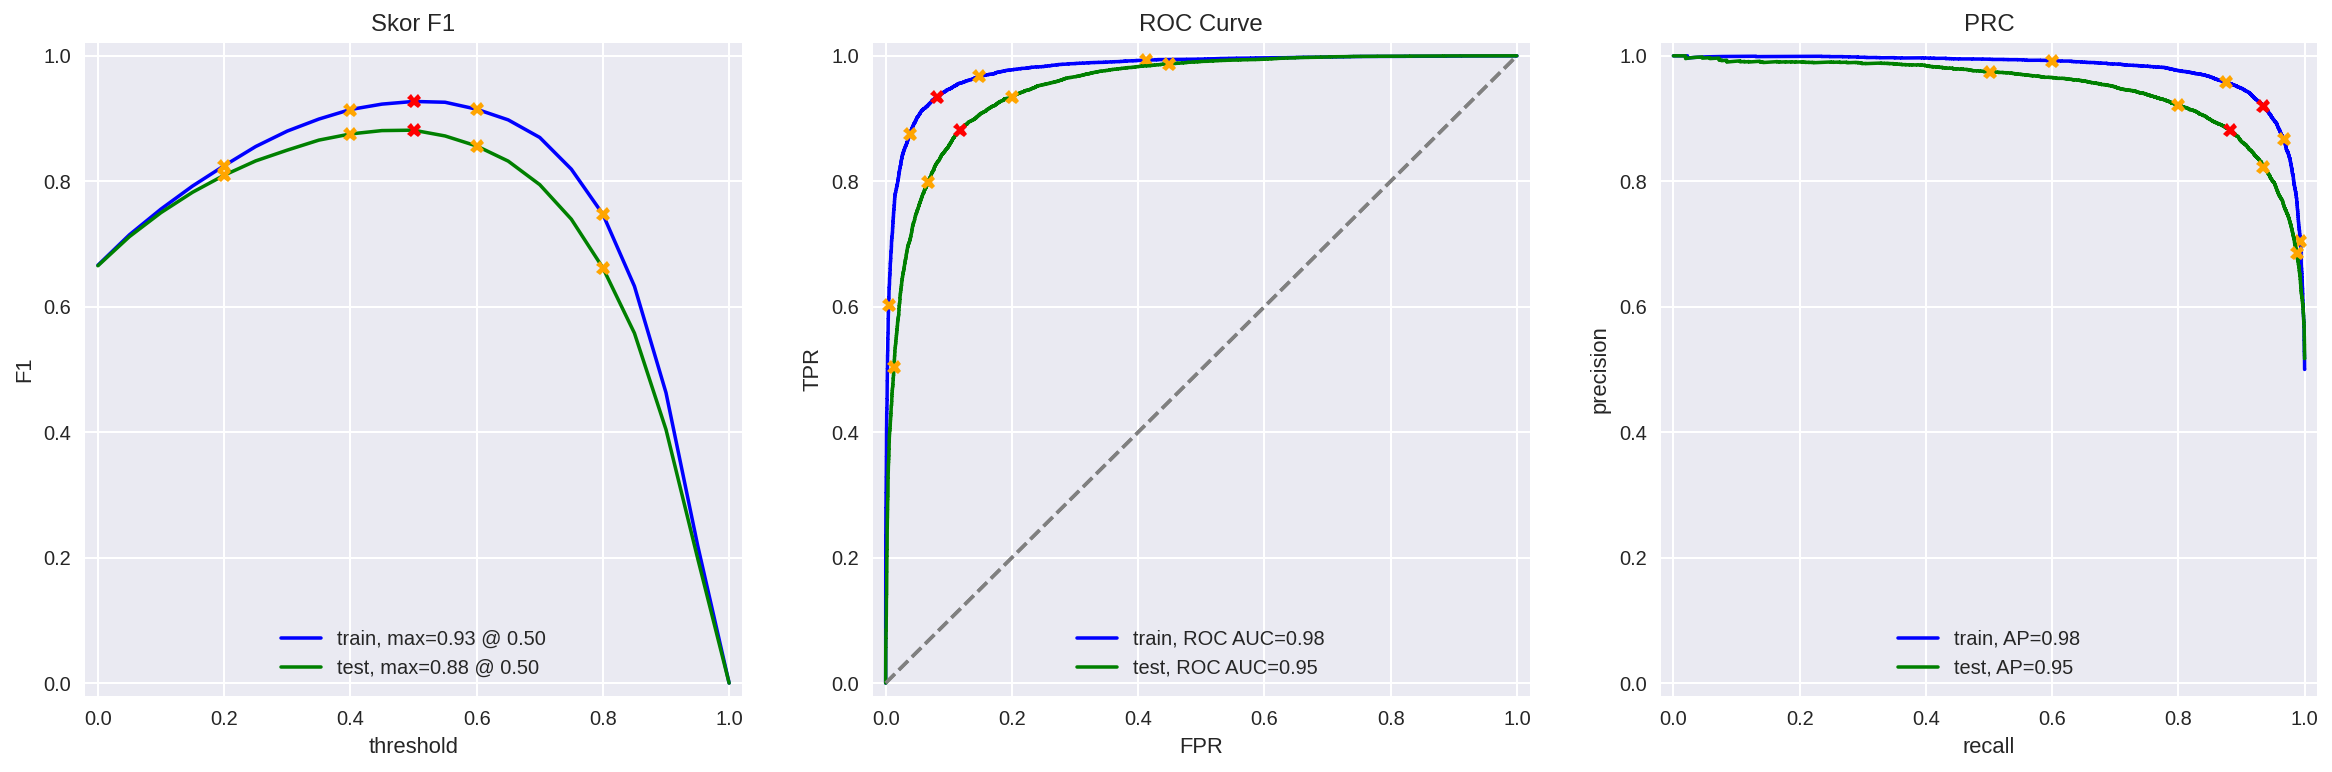

time: 1.41 s (started: 2023-09-11 00:22:25 +00:00)


In [47]:
# menampilkan evaluasi model
evaluate_model(model_4, train_features_2, train_target, test_feature_2, test_target)

Based on the results of the second model evaluation metrics, a fairly high F1_score value is obtained, which is `0.93` on the train dataset and `0.88` on the test dataset.

In [48]:
# menyimpan evaluation metric pada variabel log_metric_eva
acc_lr = accuracy_score(test_target, pred_lr_spacy)
f1_score_lr  = f1_score(test_target, pred_lr_spacy)

eva_metrics_spacy["Accuracy_score"][eva_spacy["Logistic Regression Classifier"]] = acc_lr
eva_metrics_spacy["F1 Score"][eva_spacy["Logistic Regression Classifier"]] = f1_score_lr

time: 12.7 ms (started: 2023-09-11 00:22:26 +00:00)


#### Gusion Naïve Bayes Classifier Model

In [49]:
# melatih model
model_5 = MultinomialNB()
model_5.fit(train_features_2, train_target)

# prediksi
pred_gb_spacy = model_2.predict(test_features_1)

time: 67.5 ms (started: 2023-09-11 00:22:26 +00:00)


          train  test
Accuracy   0.90  0.82
F1         0.90  0.81
APS        0.97  0.90
ROC AUC    0.97  0.91


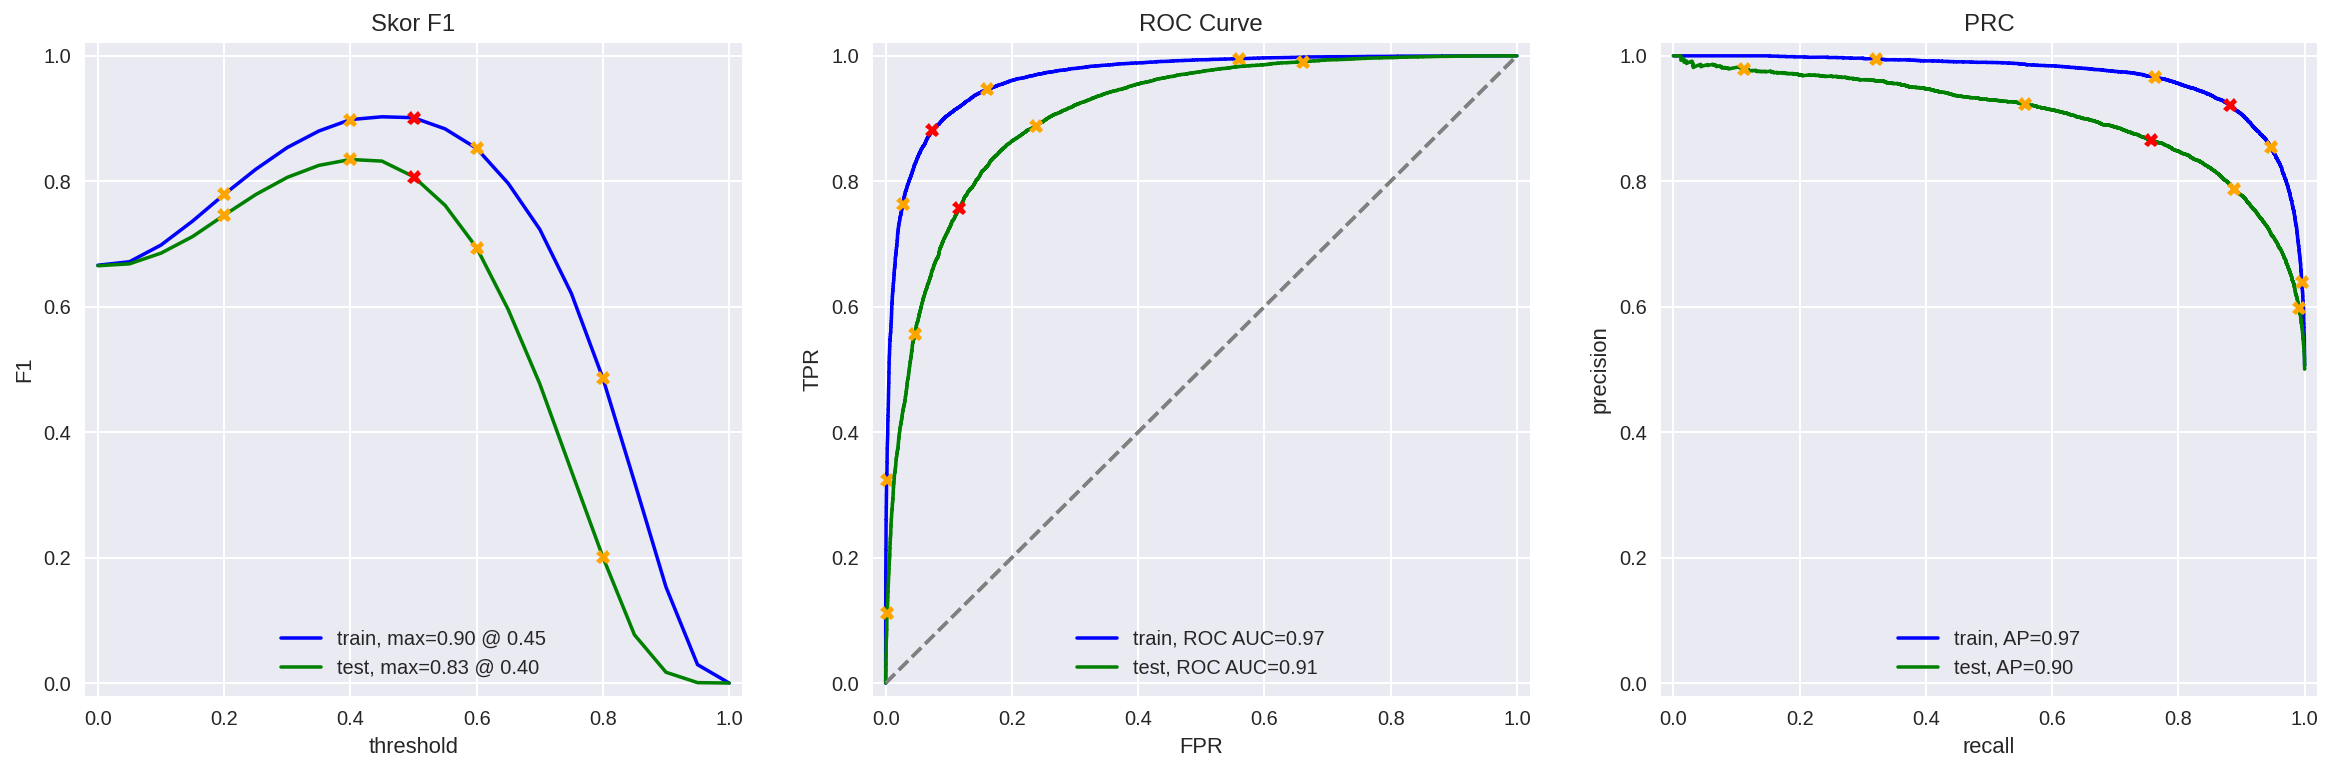

time: 1.34 s (started: 2023-09-11 00:22:26 +00:00)


In [50]:
# menampilkan evaluasi model
evaluate_model(model_5, train_features_2, train_target, test_features_2, test_target)

Based on the above results, a fairly high F1_score value is obtained in this model, which is `0.90` on the train dataset, and `0.81` on the test dataset.

In [51]:
# menyimpan evaluation metric pada variabel log_metric_eva
acc_gb = accuracy_score(test_target, pred_gb_spacy)
f1_score_gb  = f1_score(test_target, pred_gb_spacy)

eva_metrics_spacy["Accuracy_score"][eva_spacy["Gaussian Naive Bayes"]] = acc_gb
eva_metrics_spacy["F1 Score"][eva_spacy["Gaussian Naive Bayes"]] = f1_score_gb

time: 22 ms (started: 2023-09-11 00:22:28 +00:00)


#### Model Model LGBMClassifier

In [52]:
# melatih model
model_6 = LGBMClassifier(random_state=42)
model_6.fit(train_feature_2, train_target)

# prediksi model
pred_lgb_spacy = model_6.predict(test_features_2)

time: 5min 40s (started: 2023-09-11 00:22:28 +00:00)


          train  test
Accuracy   0.92  0.86
F1         0.92  0.86
APS        0.98  0.93
ROC AUC    0.98  0.94


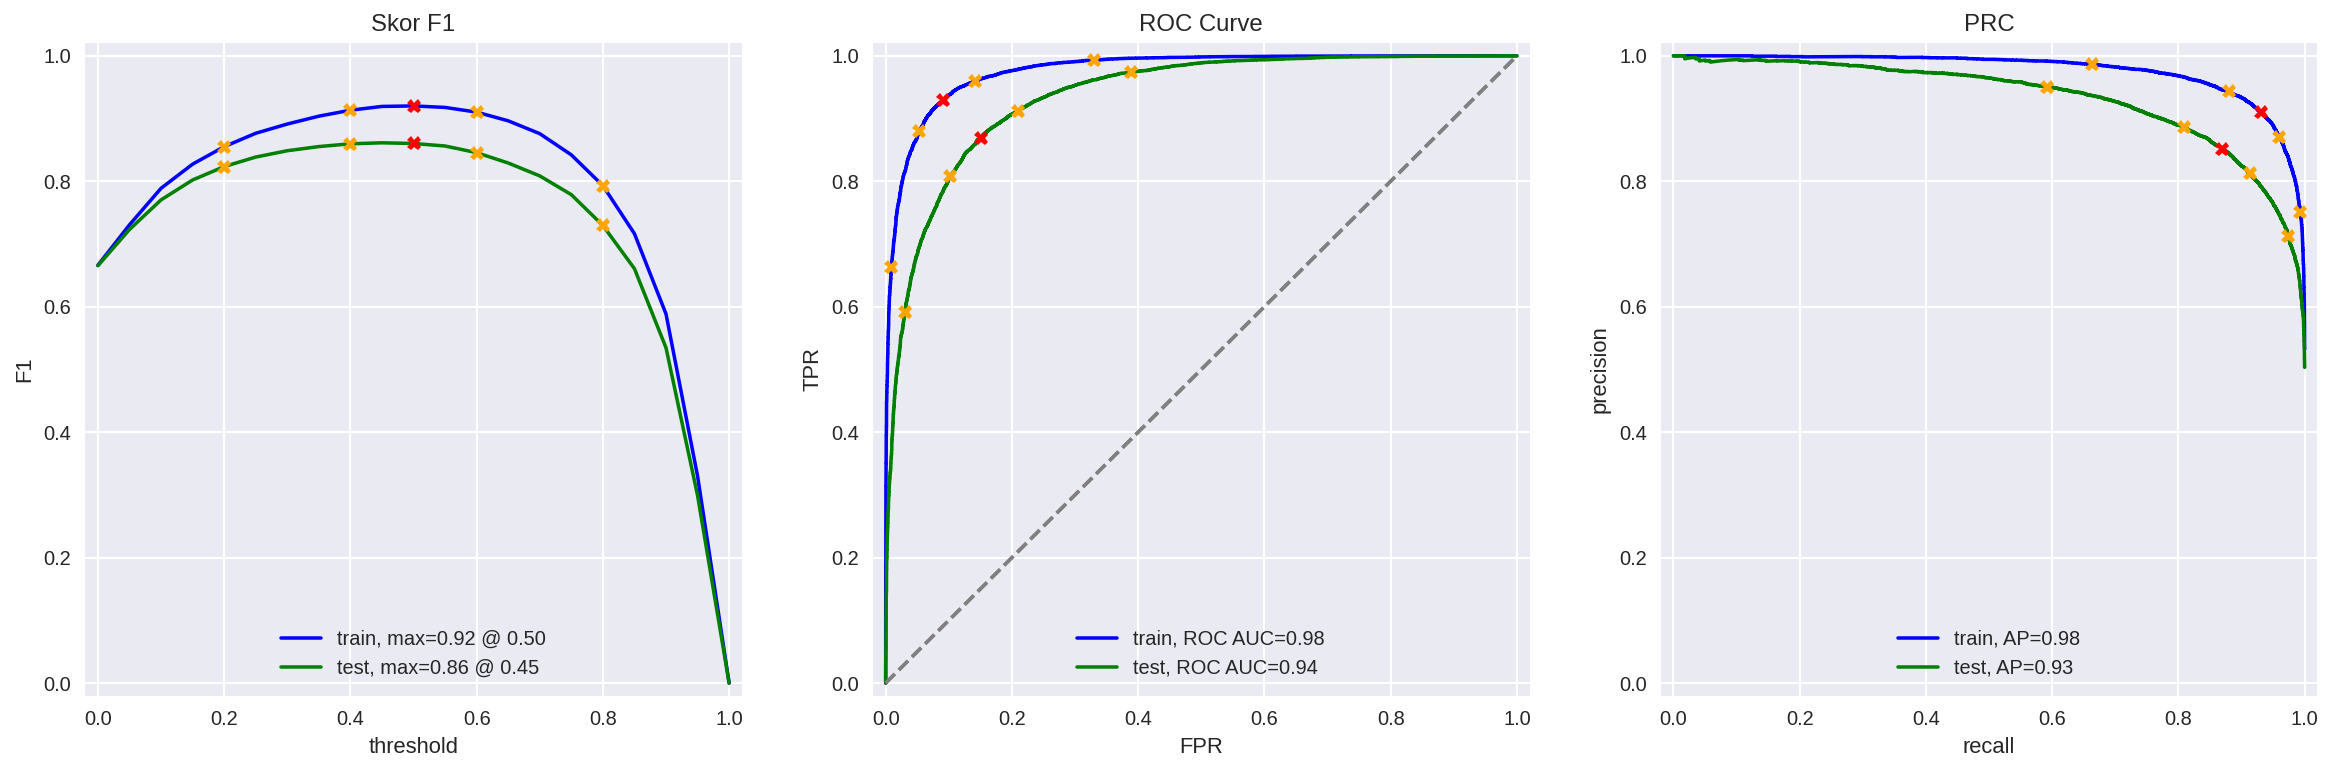

time: 3.28 s (started: 2023-09-11 00:28:08 +00:00)


In [53]:
# menampilkan evaluasi model
evaluate_model(model_6, train_feature_2, train_target, test_feature_2, test_target)

Based on the results of the LGBM Classifier model evaluation metrics, a fairly high F1_score value of `0.92` is obtained on the train dataset and `0.86` on the test dataset.

In [84]:
# menyimpan evaluation metric pada variabel log_metric_eva
acc_lgb = accuracy_score(test_target, pred_lgb_spacy)
f1_score_lgb = f1_score(test_target, pred_lgb_spacy)

eva_metrics_spacy["Accuracy_score"][eva_spacy["LightGBM Classifier"]] = acc_lgb
eva_metrics_spacy["F1 Score"][eva_spacy["LightGBM Classifier"]] = f1_score_lgb

time: 13 ms (started: 2023-09-11 01:38:38 +00:00)


### Evaluation Metrics Recap

**NLTK Methode**

In [82]:
pd.DataFrame(eva_metrics_nltk).sort_values("F1 Score", ascending=False).reset_index(drop='index')

,Models,Accuracy_score,F1 Score
0,Logistic Regression Classifier,0.883025,0.882586
1,LightGBM Classifier,0.857191,0.858371
2,Gaussian Naive Bayes,0.833397,0.824634


time: 10.6 ms (started: 2023-09-11 01:38:16 +00:00)


**spaCy Methode**

In [85]:
pd.DataFrame(eva_metrics_spacy).sort_values("F1 Score", ascending=False).reset_index(drop='index')

,Models,Accuracy_score,F1 Score
0,Logistic Regression Classifier,0.881878,0.881470
1,LightGBM Classifier,0.859273,0.860241
2,Gaussian Naive Bayes,0.833397,0.824634


time: 9.6 ms (started: 2023-09-11 01:39:20 +00:00)


***
**Insight**

Based on the above results, with 2 data pre-processing methods, NTLK and SpaCy, it is found that the logistic regression model provides the best accuracy and f1_score of `0.88`, followed by the LighGBM classifier model with an accuracy and f1-score of `0.85`. The Gaussian Naive Bayes model gives the lowest accuracy and f1-score of 'accuracy: 0.83` and `f1_score: 0.82`. Furthermore, my review prediction will be done using these 3 models.

## My Reviews

In [93]:
# membuat contoh ulasan sendiri

my_reviews = pd.DataFrame([
    'I did not simply like it, because is not my kind of movie.',
    'Well, I was bored and fall asleep in the middle of the movie but it is still good tho.',
    'I was really fascinated with the movie',
    'I didn\'t expect the reboot to be so good!',
    'The movie had its upsides and downsides, but I felt like overall it\'s a decent flick. I could not see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.',
    'I like this kind of genre and I thinking to watch it again',
    'This is bad movie, I don\'t want to watch it till end anyway',
    'This is the worst movie I ever watched'
], columns=['review'])

my_reviews['review_norm'] = my_reviews['review'].str.lower().str.replace('[^a-zA-Z]', ' ')
my_reviews

,review,review_norm
0,"I did not simply like it, because is not my ki...",i did not simply like it because is not my ki...
1,"Well, I was bored and fall asleep in the middl...",well i was bored and fall asleep in the middl...
2,I was really fascinated with the movie,i was really fascinated with the movie
3,I didn't expect the reboot to be so good!,i didn t expect the reboot to be so good
4,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i...
5,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a singl...
6,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i real...
7,I like this kind of genre and I thinking to wa...,i like this kind of genre and i thinking to wa...
8,"This is bad movie, I don't want to watch it ti...",this is bad movie i don t want to watch it ti...
9,This is the worst movie I ever watched,this is the worst movie i ever watched


time: 20.8 ms (started: 2023-09-11 02:11:20 +00:00)


In [77]:
# menyimpan ulasan dalam variabel text
texts = my_reviews['review_norm']

time: 640 µs (started: 2023-09-11 01:34:37 +00:00)


### Model 1 - Logistic Regression

In [94]:
# membuat prediksi logistic regression
pred_lr = model_1.predict(tfidf.transform(texts))
lr_pred_prob = model_1.predict_proba(tfidf.transform(texts))[:, 1]

# hasil prediksi
print(f'{sum(pred_lr)} Ulasan diprediksi dengan komentar positif dari {len(lr_pred_prob)} ulasan')
print('='*15)
print()
print('Pos:'+'  '+'Proba:'+'  '+'Review')
for i, review in enumerate(my_reviews['review'].str.slice(0, 100)):
    print(f'  {pred_lr[i]}:   {lr_pred_prob[i]:.2f}:  {review}')

5 Ulasan diprediksi dengan komentar positif dari 10 ulasan

Pos:  Proba:  Review
  0:   0.14:  I did not simply like it, because is not my kind of movie.
  1:   0.51:  Well, I was bored and fall asleep in the middle of the movie but it is still good tho.
  1:   0.54:  I was really fascinated with the movie
  1:   0.65:  I didn't expect the reboot to be so good!
  0:   0.38:  The movie had its upsides and downsides, but I felt like overall it's a decent flick. I could not se
  0:   0.04:  What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even ki
  1:   0.82:  Launching on Netflix was a brave move & I really appreciate being able to binge on episode after epi
  1:   0.57:  I like this kind of genre and I thinking to watch it again
  0:   0.11:  This is bad movie, I don't want to watch it till end anyway
  0:   0.00:  This is the worst movie I ever watched
time: 9.11 ms (started: 2023-09-11 02:11:24 +00:00)


### Model 2 - Gusion Naïve Bayes Classifier

In [89]:
# membuat prediksi logistic regression
pred_gb = model_2.predict(tfidf.transform(texts))
gb_pred_prob = model_2.predict_proba(tfidf.transform(texts))[:, 1]

# hasil prediksi
print(f'{sum(pred_gb)} Ulasan diprediksi dengan komentar positif dari {len(gb_pred_prob)} ulasan')
print('='*15)
print()
print('Pos:'+'  '+'Proba:'+'  '+'Review')
for i, review in enumerate(my_reviews['review'].str.slice(0, 100)):
    print(f'  {pred_gb[i]}:   {gb_pred_prob[i]:.2f}:  {review}')

3 Ulasan diprediksi dengan komentar positif dari 10 ulasan

Pos:  Proba:  Review
  0:   0.36:  I did not simply like it, because is not my kind of movie.
  0:   0.27:  Well, I was bored and fall asleep in the middle of the movie but it is still good tho.
  1:   0.60:  I was really fascinated with the movie
  1:   0.54:  I didn't expect the reboot to be so good!
  0:   0.38:  The movie had its upsides and downsides, but I felt like overall it's a decent flick. I could see my
  0:   0.16:  What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even ki
  1:   0.61:  Launching on Netflix was a brave move & I really appreciate being able to binge on episode after epi
  0:   0.42:  I like this kind of genre and I thinking to watch it again
  0:   0.35:  This is bad movie, I don't want to watch it till end anyway
  0:   0.15:  This is the worst movie I ever watched
time: 13.5 ms (started: 2023-09-11 02:04:06 +00:00)


### Model 3 - LGBM Classifier

In [90]:
# membuat prediksi logistic regression
pred_lgb = model_3.predict(tfidf.transform(texts))
lgb_pred_prob = model_3.predict_proba(tfidf.transform(texts))[:, 1]

# hasil prediksi
print(f'{sum(pred_lgb)} Ulasan diprediksi dengan komentar positif dari {len(lgb_pred_prob)} ulasan')
print('='*15)
print()
print('Pos:'+'  '+'Proba:'+'  '+'Review')
for i, review in enumerate(my_reviews['review'].str.slice(0, 100)):
    print(f'  {pred_lgb[i]}:   {lgb_pred_prob[i]:.2f}:  {review}')

7 Ulasan diprediksi dengan komentar positif dari 10 ulasan

Pos:  Proba:  Review
  1:   0.58:  I did not simply like it, because is not my kind of movie.
  1:   0.65:  Well, I was bored and fall asleep in the middle of the movie but it is still good tho.
  1:   0.59:  I was really fascinated with the movie
  1:   0.69:  I didn't expect the reboot to be so good!
  1:   0.63:  The movie had its upsides and downsides, but I felt like overall it's a decent flick. I could see my
  0:   0.22:  What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even ki
  1:   0.66:  Launching on Netflix was a brave move & I really appreciate being able to binge on episode after epi
  1:   0.64:  I like this kind of genre and I thinking to watch it again
  0:   0.19:  This is bad movie, I don't want to watch it till end anyway
  0:   0.08:  This is the worst movie I ever watched
time: 52.3 ms (started: 2023-09-11 02:04:12 +00:00)


***
**Insight**

Based on the prediction results of 10 own reviews, with actual reviews of `5 positive reviews` and `5 negative reviews`, it is found that the logistic linear model provides predictions similar to the actual reviews, so it can be concluded that the performance of the logistic linear model is better than other models.

## General Conclusion

- The dataset received is IMDB movie review data containing 47331 observations with 17 columns. For the development of predictive models, the columns used are the `review` column, which contains reviews; the `pos`, which is a review polarity label and the `ds_par` column, which will be used as a reference in dividing the train and test datasets.
- Based on data exploration, the following information was obtained:
1. The number of movies tends to increase every year; the highest number of movies occurred in the year `2006`, but in the following year it decreased.
2. Generally, each movie has a few reviews, but there is a high peak in the number of reviews `30`, meaning that there are quite a lot of movies around `400` movies that have a large number of reviews.
3. The dataset has class balance as the proportion of negative and positive reviews is almost similar, with `50.1% negative reviews` and `49.9% positive reviews`.
- There are 3 predictive models developed: `Logistic Regression`, `Gusion Naïve Bayes Classifier`, and `LGBM Classifier` with 2 pre-processing methods viz: NTLK & TF-IDF and SpaCy & TF-IDF. After testing the test dataset and the reviews themselves, it is found that the **Logistic Regression** model provides the best performance among the other 2 models, where the **F1 score** obtained on the test dataset is **0.88**.